In [1]:
#For this homework, use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
#The Lead dataset is designed for a binary classification task,
#where the target variable is Converted (indicating whether a lead converted to customer, with values 0 or 1).
#The other columns are features that describe the lead's characteristics, behavior, and interactions.
#The explanation of the columns are given below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

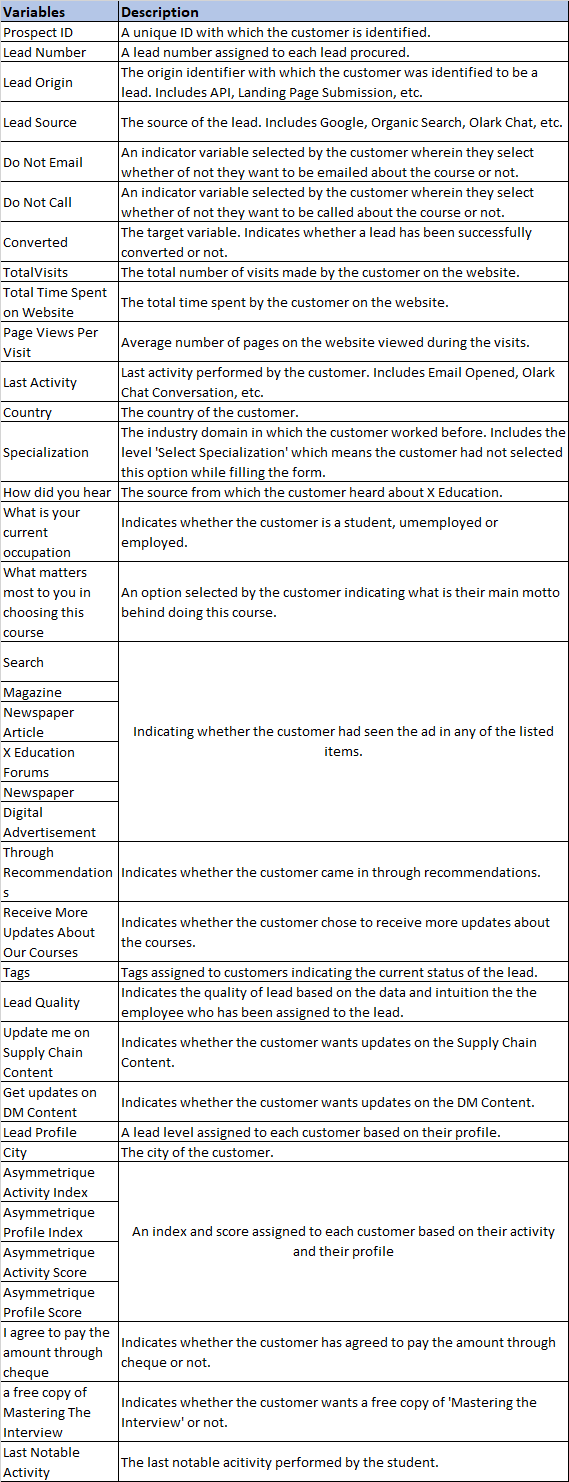

In [4]:
#Q1 (15 pt) -There are missing values in the Lead data.
#Replace missing values with the mean if the variable is numeric and  with the mode if the variable is categorical.
#Note: If the data type (Dtype) is object, the variable is categorical and
#if the data type (Dtype) is int64 or float64, the variable is numerical.
#For Numeric features

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

Label encoding is a technique used in machine learning to convert categorical data into numerical format. Each unique category value is assigned an integer value. For example, if you have a categorical feature like "color" with values "red," "green," and "blue," label encoding might transform these into 0, 1, and 2, respectively. This is useful because many machine learning algorithms require numerical input. However, it can imply an ordinal relationship where none exists, which might not be appropriate for all datasets.

When to Use

Use label encoding for ordinal data or tree-based models.

Use dummy variables for nominal data or models sensitive to ordinal assumptions such as linear regression

In [5]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#Q2-(15 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID,	Lead Number  and Converted from the input variables and use Converted as target variables.
#Split data into train and test using 30% of the data

df = df.drop([col.strip() for col in ['Prospect ID', 'Lead Number', 'Converted']], axis=1, errors='ignore')

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

target_variable = 'Converted'

X = df
y = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

display(df.head())

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0.0,0,0.0,10,12,15,...,0,4,4,1,1,15.0,15.0,0,0,8
1,0,7,0,0,5.0,674,2.5,5,12,15,...,0,4,4,1,1,15.0,15.0,0,0,4
2,1,1,0,0,2.0,1532,2.0,5,12,1,...,0,3,0,1,0,14.0,20.0,0,1,4
3,1,1,0,0,1.0,305,1.0,13,12,11,...,0,4,0,1,0,13.0,17.0,0,0,8
4,1,3,0,0,2.0,1428,1.0,1,12,15,...,0,4,0,1,0,15.0,18.0,0,0,8


X_train shape: (6468, 34)
X_test shape: (2772, 34)
y_train shape: (6468,)
y_test shape: (2772,)


In [ ]:
#Q3(10 pt) Assuming Converted = 1 represents the positive case (i.e., a lead converts into a customer),
# define what is false positive and false negative in this dataset?
#Which one is more important  metric (precison or recall) in this case? Why?

**Recall** - measures the ability of a model to identify all the actual positive cases (leads that convert). It is calculated as the ratio of correctly predicted positive cases to the total number of actual positive cases.

**Precision** - measures the accuracy of positive predictions made by the model. It is calculated as the ratio of correctly predicted positive cases to the total number of predicted positive cases.

In this scenario, the business goal is likely to maximize customer acquisition (conversions). Therefore, it is more important to correctly identify as many potential customers as possible (high recall), even if it means misclassifying some leads as potential customers who ultimately do not convert (lower precision).


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416


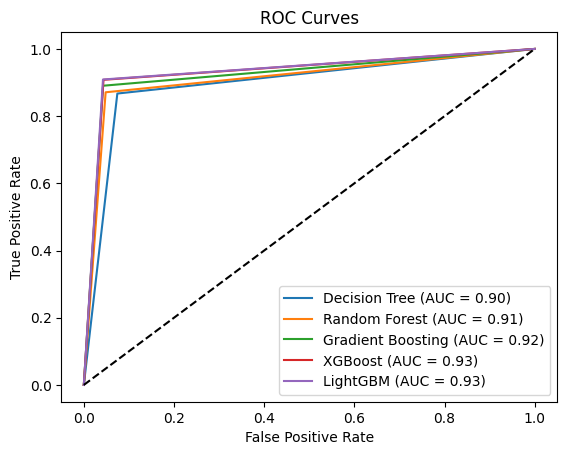

--- Decision Tree ---
Accuracy: 0.902958152958153
Precision: 0.8811320754716981
Recall: 0.8672237697307336
Confusion Matrix: [[1569  126]
 [ 143  934]]
AUC: 0.8964437432724464


--- Random Forest ---
Accuracy: 0.9202741702741702
Precision: 0.9196078431372549
Recall: 0.8709377901578459
Confusion Matrix: [[1613   82]
 [ 139  938]]
AUC: 0.911280104518451


--- Gradient Boosting ---
Accuracy: 0.9314574314574314
Precision: 0.930164888457808
Recall: 0.8904363974001857
Confusion Matrix: [[1623   72]
 [ 118  959]]
AUC: 0.9239792606469954


--- XGBoost ---
Accuracy: 0.9375901875901876
Precision: 0.9296577946768061
Recall: 0.9080779944289693
Confusion Matrix: [[1621   74]
 [  99  978]]
AUC: 0.9322100886599125


--- LightGBM ---
Accuracy: 0.9386724386724387
Precision: 0.9314938154138915
Recall: 0.9090064995357474
Confusion Matrix: [[1623   72]
 [  98  979]]
AUC: 0.9332643117147763




In [13]:
#Q4(60 pt)Use decison tree, random forest and boosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores,precison and recall  on test  data.
# Report confusion metrics as well for these methods on test  data.
# Get the AUC score for this methods and draw ROC curve on test  data. .
#Which methods gave  best performance on test data based on accuracy metric,precison, recall metric and AUC soore?

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)


    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': confusion,
        'AUC': auc
    }


    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

for model_name, metrics in results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")